In [407]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway, kruskal
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")
# utility function
from student import drop_columns

In [408]:
#Loading the dataset and display the first few rows
df = pd.read_csv("global_cancer_patients_2015_2024.csv")
df.head()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


In [409]:
#Check for the columns in the dataframe
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Country_Region', 'Year', 'Genetic_Risk',
       'Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level',
       'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD', 'Survival_Years',
       'Target_Severity_Score'],
      dtype='object')

In [410]:
#Show the number of rows and columns in the dataset
print(f'The dataframe contains {df.shape[0]} rows')
print(f'The dataframe contains {df.shape[1]} columns')

The dataframe contains 50000 rows
The dataframe contains 15 columns


In [411]:
# Get the basic information and concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [412]:
#checking the summary statistics of the dataset
df.describe()

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,54.421540,2019.480520,5.001698,5.010126,5.010880,4.989826,4.991176,52467.298239,5.006462,4.951207
std,20.224451,2.871485,2.885773,2.888399,2.888769,2.881579,2.894504,27363.229379,2.883335,1.199677
min,20.000000,2015.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5000.050000,0.000000,0.900000
25%,37.000000,2017.000000,2.500000,2.500000,2.500000,2.500000,2.500000,28686.225000,2.500000,4.120000
50%,54.000000,2019.000000,5.000000,5.000000,5.000000,5.000000,5.000000,52474.310000,5.000000,4.950000
75%,72.000000,2022.000000,7.500000,7.500000,7.500000,7.500000,7.500000,76232.720000,7.500000,5.780000
max,89.000000,2024.000000,10.000000,10.000000,10.000000,10.000000,10.000000,99999.840000,10.000000,9.160000


In [413]:
# Check for the duplicates in the dataframe 
df.duplicated().sum()

0

There are no duplicates in the dataframe so the dataframe will remain unchanged 

In [414]:
#Check for the data types of the columns in the dataframe
df.dtypes

Patient_ID                object
Age                        int64
Gender                    object
Country_Region            object
Year                       int64
Genetic_Risk             float64
Air_Pollution            float64
Alcohol_Use              float64
Smoking                  float64
Obesity_Level            float64
Cancer_Type               object
Cancer_Stage              object
Treatment_Cost_USD       float64
Survival_Years           float64
Target_Severity_Score    float64
dtype: object

In [415]:
# Checking for missing values in the dataset
df.isna().sum()

Patient_ID               0
Age                      0
Gender                   0
Country_Region           0
Year                     0
Genetic_Risk             0
Air_Pollution            0
Alcohol_Use              0
Smoking                  0
Obesity_Level            0
Cancer_Type              0
Cancer_Stage             0
Treatment_Cost_USD       0
Survival_Years           0
Target_Severity_Score    0
dtype: int64

There aren't any missing values in the dataframe so the dataframe will remain unchanged 

The following are the irrelevant columns that we are going to drop that are not needed  for  analysis and modeling
1.


In [416]:


# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store outlier indices per feature
outlier_indices = {}

# Loop through each numeric column to compute IQR and find outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_indices[col] = outliers.index.tolist()
    
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")
    print("-" * 40)


Column: Age
Number of outliers: 0
----------------------------------------
Column: Year
Number of outliers: 0
----------------------------------------
Column: Genetic_Risk
Number of outliers: 0
----------------------------------------
Column: Air_Pollution
Number of outliers: 0
----------------------------------------
Column: Alcohol_Use
Number of outliers: 0
----------------------------------------
Column: Smoking
Number of outliers: 0
----------------------------------------
Column: Obesity_Level
Number of outliers: 0
----------------------------------------
Column: Treatment_Cost_USD
Number of outliers: 0
----------------------------------------
Column: Survival_Years
Number of outliers: 0
----------------------------------------
Column: Target_Severity_Score
Number of outliers: 151
----------------------------------------


There are **151 outliers** detected in the `Target_Severity_Score` column based on the IQR method, and they will be **dropped** to improve model reliability.


In [417]:
# Handling Outliers in Target_Severity_Score
#During exploratory data analysis, outliers were identified in the Target_Severity_Score column using the Interquartile Range (IQR) method. A total of 151 outliers were detected. Given that the dataset contains a sufficient number of records, these outliers were removed to reduce their potential impact on model performance and to ensure more stable and reliable predictions. This step was taken to improve model generalization and reduce the risk of overfitting due to extreme values.

In [418]:
df = df[(df['Target_Severity_Score'] >= lower_bound) & (df['Target_Severity_Score'] <= upper_bound)]


In [419]:
#Checking agin to see the basic information of the dataset after dropping the outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49849 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             49849 non-null  object 
 1   Age                    49849 non-null  int64  
 2   Gender                 49849 non-null  object 
 3   Country_Region         49849 non-null  object 
 4   Year                   49849 non-null  int64  
 5   Genetic_Risk           49849 non-null  float64
 6   Air_Pollution          49849 non-null  float64
 7   Alcohol_Use            49849 non-null  float64
 8   Smoking                49849 non-null  float64
 9   Obesity_Level          49849 non-null  float64
 10  Cancer_Type            49849 non-null  object 
 11  Cancer_Stage           49849 non-null  object 
 12  Treatment_Cost_USD     49849 non-null  float64
 13  Survival_Years         49849 non-null  float64
 14  Target_Severity_Score  49849 non-null  float64
dtypes:

In [420]:
#Checking to see the shape of the dataset
print(f'The dataframe now contains {df.shape[0]} rows')
print(f'The dataframe now contains {df.shape[1]} columns')

The dataframe now contains 49849 rows
The dataframe now contains 15 columns


In [421]:
df['Year'].head()

0    2021
1    2021
2    2023
3    2015
4    2017
Name: Year, dtype: int64

In [422]:
df.head(10)

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
5,PT0000005,22,Male,Germany,2018,9.5,6.4,3.3,3.9,5.1,Cervical,Stage IV,33468.99,9.5,5.98
6,PT0000006,41,Male,Canada,2021,5.1,8.2,0.3,3.7,2.1,Cervical,Stage 0,9790.83,1.0,5.05
7,PT0000007,72,Female,Canada,2018,6.0,8.2,6.4,0.6,8.5,Prostate,Stage I,17161.40,6.2,6.02
8,PT0000008,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,Stage II,56458.48,6.5,3.36
9,PT0000009,49,Female,Canada,2016,8.1,0.8,7.8,5.2,9.3,Prostate,Stage II,56133.45,5.7,5.76


In [424]:
#Dropping the irrelevant columns that are not needed for the analysis and modeling
drop_cols = ['Patient_ID', 'Country_Region', 'Year', 'Age','Gender']
df = drop_columns(df, drop_cols)

In [425]:
#df['Target_Severity_Score'] = (df['Target_Severity_Score'] > 5).astype(int)

Below we are binarizing the `Target_Severity_Score` column into two categories: `High` and `Low`. The threshold for categorization is set at 0 for `Low` and above 0 for `High`. This will help in simplifying the target variable for classification tasks.The binarized column will be named `Target`

In [426]:

threshold = df['Target_Severity_Score'].median()  

df['target'] = (df['Target_Severity_Score'] >= threshold).astype(int)


In [427]:
df.columns

Index(['Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Cancer_Type', 'Cancer_Stage', 'Treatment_Cost_USD',
       'Survival_Years', 'Target_Severity_Score', 'Severity_Score_Level',
       'target'],
      dtype='object')

We create a column `Severity_Score_Level` just to categorize the `Target_Severity_Score` into `High` and `Low` based on the threshold of 0. This will help in understanding the severity levels in a more intuitive way.

In [442]:
# Create a new column called Severity_Level based on the condition
df['Severity_Score_Level'] = df['Target_Severity_Score'].apply(lambda x: 'High' if x > 5 else 'Low')
df.head()


,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score,Severity_Score_Level,target,Survived_5_Years
0,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92,Low,0,1
1,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65,Low,0,0
2,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84,High,1,1
3,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12,Low,0,0
4,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62,Low,0,0


**Visualizations**

The boxplot below shows the distribution of 'Survival_Years' for each 'Cancer_Stage'.
Interpretation:
- The central line in each box represents the median survival years for that cancer stage.
- The box shows the interquartile range (IQR), where the middle 50% of survival years lie.
- Whiskers extend to show the range of most of the data, excluding outliers.
- By comparing boxes, you can see which cancer stages have higher or lower median survival, and how variable survival is within each stage.
- Stage 0 has a higher median and a taller box, patients in this stage tend to survive longer and have more variation in survival years compared to later stages.
- Stage IV has the lowest median survival years, indicating poorer outcomes for patients in this stage.

In [428]:
# Calculate the average survival years by cancer stage
avg_survival_by_stage = df.groupby('Cancer_Stage')['Survival_Years'].mean()
print(avg_survival_by_stage)

Cancer_Stage
Stage 0      5.012644
Stage I      5.013586
Stage II     4.995588
Stage III    5.035590
Stage IV     4.970938
Name: Survival_Years, dtype: float64


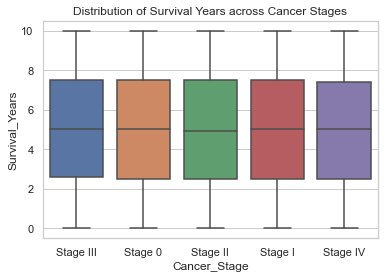

In [429]:
sns.boxplot(x='Cancer_Stage', y='Survival_Years', data=df)
plt.title("Distribution of Survival Years across Cancer Stages")
plt.show()


This plot shows the distribution of patients based on the severity of their cancer, categorized as High or Low. It helps visualize how many patients fall into each severity level, providing insight into the overall severity burden within the dataset.

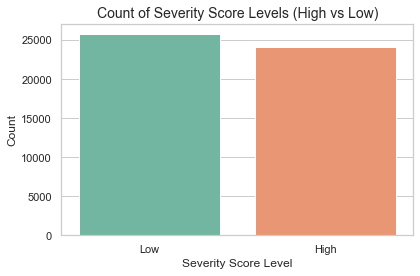

In [430]:


# Set the plot style
sns.set(style="whitegrid")

# Plot the count of High and Low severity levels
plt.figure(figsize=(6, 4))
sns.countplot(x='Severity_Score_Level', data=df, palette='Set2')

# Add titles and labels
plt.title('Count of Severity Score Levels (High vs Low)', fontsize=14)
plt.xlabel('Severity Score Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


From the countplot we can see that the low severity score is the most common then the high severity score meaning that most of the incidents are not severe.

In [431]:
#checking the value counts of the Severity score levels
df["Severity_Score_Level"].value_counts()

Low     25790
High    24059
Name: Severity_Score_Level, dtype: int64

In [432]:
df['Cancer_Type'].value_counts()

Colon       6355
Prostate    6293
Leukemia    6248
Liver       6225
Skin        6208
Cervical    6200
Breast      6179
Lung        6141
Name: Cancer_Type, dtype: int64

We now plot a correlation heatmap to visualize the relationships between different features in the dataset. The heatmap shows how strongly each pair of features is correlated, with darker colors indicating stronger correlations.

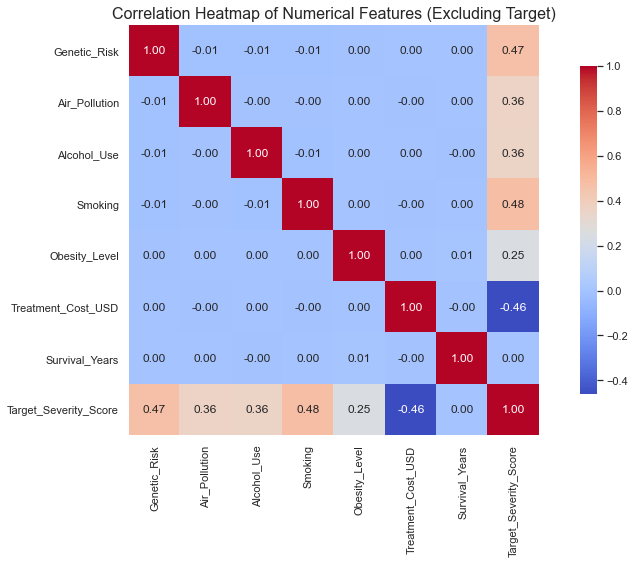

In [441]:
# Plotting the correlation heatmap excluding the 'target' column
cols_for_corr = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col != 'target']
plt.figure(figsize=(12, 8))
sns.heatmap(df[cols_for_corr].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Numerical Features (Excluding Target)', fontsize=16)
plt.tight_layout()

From the heatmap we can see that the `Target_Severity_Score` has a positive correlation with `Genetic_Risk`,`Air_Pollution`,`Alcohol_Use`,`Smoking` and `Obesity_Levels` which means that as these factors increase, the severity score also tends to increase. This suggests that these are significant factors may contribute to higher cancer severity.


We create a new binary column in the dataframe and plot a countplot to visualize the survival status of patients based on their survival years.

```python

If a patient survived more than 5 years (Survival_Years > 5), it assigns a value of 1.

Otherwise (5 years or less), it assigns a value of 0.

So now:

1 = Patient survived more than 5 years

0 = Patient survived 5 years or less



In [434]:
df['Survived_5_Years'] = (df['Survival_Years'] > 5).astype(int)


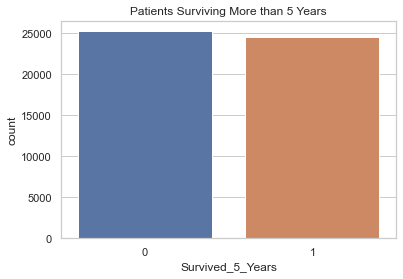

In [435]:
sns.countplot(x='Survived_5_Years', data=df)
plt.title("Patients Surviving More than 5 Years")
plt.show()


So from the countplot we can see that most of the patients survived less than 5 years which indicates that the dataset may contain a significant number of patients with poor prognosis or advanced cancer stages.

Finally, we plot a bar chart to visualize the average survival years for each cancer stage. This helps us understand how survival varies across different stages of cancer.

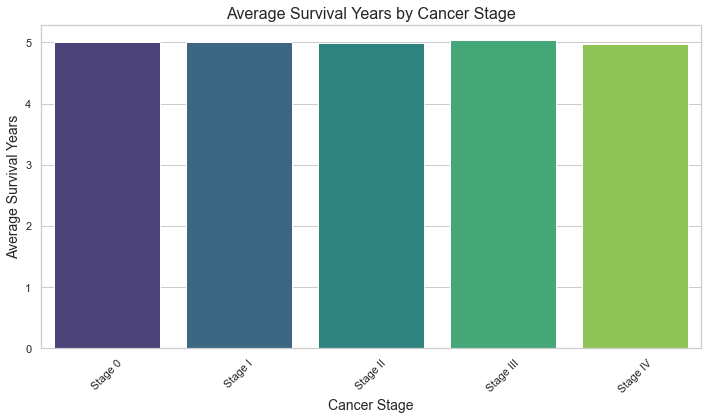

In [436]:
# we plot a bar chart to visualize the average survival years for each cancer stage
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_survival_by_stage.index, y=avg_survival_by_stage.values, palette='viridis')
plt.title('Average Survival Years by Cancer Stage', fontsize=16)
plt.xlabel('Cancer Stage', fontsize=14)
plt.ylabel('Average Survival Years', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [437]:
df["Survived_5_Years"].value_counts()


0    25268
1    24581
Name: Survived_5_Years, dtype: int64

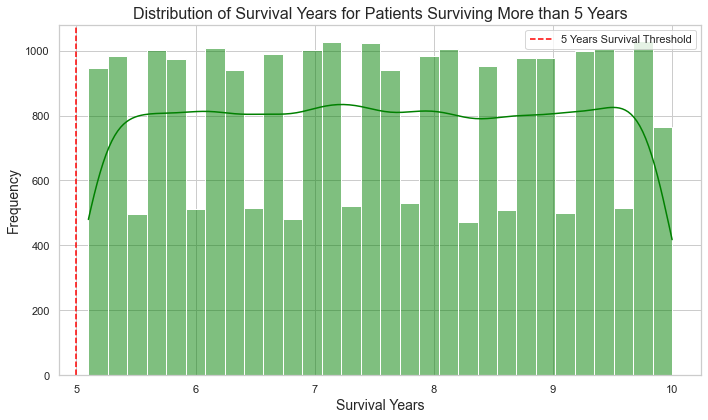

In [438]:
#We plot the distribution of survival years for patients who survived more than 5 years
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Survived_5_Years'] == 1]['Survival_Years'], bins=30, kde=True, color='green')
plt.title('Distribution of Survival Years for Patients Surviving More than 5 Years', fontsize=16)   
plt.xlabel('Survival Years', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(x=5, color='red', linestyle='--', label='5 Years Survival Threshold')
plt.legend()
plt.tight_layout()
plt.show();

The plot above shows the distribution of survival years for patients who survived more than 5 years. Most patients in this group survived between 5 and 10 years, with the frequency decreasing as survival years increase. The red dashed line at 5 years marks the threshold used to define long-term survival. This visualization highlights that while some patients achieve extended survival, the majority cluster closer to the 5-year mark, indicating that surviving significantly longer than 5 years is less common.

**Hypothesis Testing**
In this section we will perform hypothesis testing to investigate whether there are significant differences in survival years across different cancer stages.This analysis investigates whether survival outcomes differ significantly across cancer stages by  testing for normality using the Shapiro-Wilk test and checking for equal variances with Levene’s test. If assumptions are met, a One-Way ANOVA is conducted, followed by Tukey’s HSD post-hoc test if significant, to identify which cancer stages show meaningful differences in survival—addressing the second objective of the project.


Null Hypothesis (H₀):
There is no significant difference in the median survival years among patients at different cancer stages.

Alternative Hypothesis (H₁):
There is a significant difference in the median survival years among patients at different cancer stages.

In [439]:
# Test normality within each stage
for stage in df['Cancer_Stage'].unique():
    stat, p = shapiro(df[df['Cancer_Stage'] == stage]['Survival_Years'])
    print(f'Shapiro test for {stage}: p-value={p}')

# Test homogeneity of variances
stat, p = levene(*[df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()])
print(f'Levene test p-value={p}')

# If assumptions met:
stat, p = f_oneway(*[df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()])
print(f'ANOVA p-value={p}')

# If significant, do post-hoc Tukey test
if p < 0.05:
    tukey = pairwise_tukeyhsd(endog=df['Survival_Years'], groups=df['Cancer_Stage'], alpha=0.05)
    print(tukey)


Shapiro test for Stage III: p-value=0.0
Shapiro test for Stage 0: p-value=0.0
Shapiro test for Stage II: p-value=0.0
Shapiro test for Stage I: p-value=0.0
Shapiro test for Stage IV: p-value=0.0
Levene test p-value=0.77905976235781
ANOVA p-value=0.5973811921947265


The shapiro wilk test reults show that the survival years are not normally diastributed (p-value < 0.05), indicating that the assumption of normality is violated.So we will use the Kruskal-Wallis test instead of ANOVA to compare survival years across cancer stages.
The Anova pvalue is 0.59738 we fail to reject the null hypothesis, indicating that there is no significant difference in survival years across different cancer stages. 

In [440]:
from scipy.stats import kruskal

groups = [df[df['Cancer_Stage'] == stage]['Survival_Years'] for stage in df['Cancer_Stage'].unique()]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis test p-value = {p}")


Kruskal-Wallis test p-value = 0.598630361474873


From the Kruskal wallis test we now conclude that cancer stage does not significantly impact survival years 